In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'spam.csv')
df

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


In [3]:
"""
encodings = ['utf-8','latin1','ISO-8859-1','cp1252']

file_path = 'emails.csv'

for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f'File successfully read with encoding: {encoding}')
        break
    except UnicodeDecodeError:
        print(f'Failed to read with encoding: {encoding}')
        continue
        
        
if 'df' in locals():
    print('CSV file has been successfully loaded.')
else:
    print('All encoding attempts failed. Unable to read the csv file.')
    
"""

"\nencodings = ['utf-8','latin1','ISO-8859-1','cp1252']\n\nfile_path = 'emails.csv'\n\nfor encoding in encodings:\n    try:\n        df = pd.read_csv(file_path, encoding=encoding)\n        print(f'File successfully read with encoding: {encoding}')\n        break\n    except UnicodeDecodeError:\n        print(f'Failed to read with encoding: {encoding}')\n        continue\n        \n        \nif 'df' in locals():\n    print('CSV file has been successfully loaded.')\nelse:\n    print('All encoding attempts failed. Unable to read the csv file.')\n    \n"

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


In [5]:
df.isnull().sum()

type    0
text    0
dtype: int64

In [6]:
df.shape

(5559, 2)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()

In [9]:
df['type'] = encoder.fit_transform(df['type']) #ham takes value 0 and spam takes value 1

In [10]:
df.head()

,type,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,1,okmail: Dear Dave this is your final notice to...


In [11]:
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(keep='first',inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5156, 2)

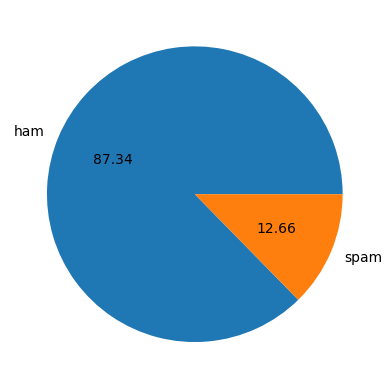

In [15]:
plt.pie(df['type'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [16]:
#pip install nltk

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
#no. of char
df['num_characters'] = df['text'].apply(len)
df.head()

,type,text,num_characters
0,0,Hope you are having a good week. Just checking in,49
1,0,K..give back my thanks.,23
2,0,Am also doing in cbe only. But have to pay.,43
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,1,okmail: Dear Dave this is your final notice to...,161


In [20]:
#no. of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,type,text,num_characters,num_words
0,0,Hope you are having a good week. Just checking in,49,11
1,0,K..give back my thanks.,23,7
2,0,Am also doing in cbe only. But have to pay.,43,12
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23
4,1,okmail: Dear Dave this is your final notice to...,161,32


In [21]:
#no of sentence
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,type,text,num_characters,num_words,num_sent
0,0,Hope you are having a good week. Just checking in,49,11,2
1,0,K..give back my thanks.,23,7,1
2,0,Am also doing in cbe only. But have to pay.,43,12,2
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3
4,1,okmail: Dear Dave this is your final notice to...,161,32,3


In [22]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5156.000000,5156.000000,5156.000000
mean,78.658844,18.174166,1.974011
std,57.615904,12.756129,1.458812
min,2.000000,1.000000,1.000000
25%,35.000000,9.000000,1.000000
50%,60.000000,14.000000,1.500000
75%,117.250000,26.000000,2.000000
max,910.000000,196.000000,38.000000


In [23]:
#targeting ham
df[df['type'] == 0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4503.000000,4503.000000,4503.000000
mean,70.104375,16.789252,1.827226
std,55.626601,12.810142,1.393931
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,196.000000,38.000000


In [24]:
#targeting spam
df[df['type'] == 1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.649311,27.724349,2.986217
std,29.825481,6.988639,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

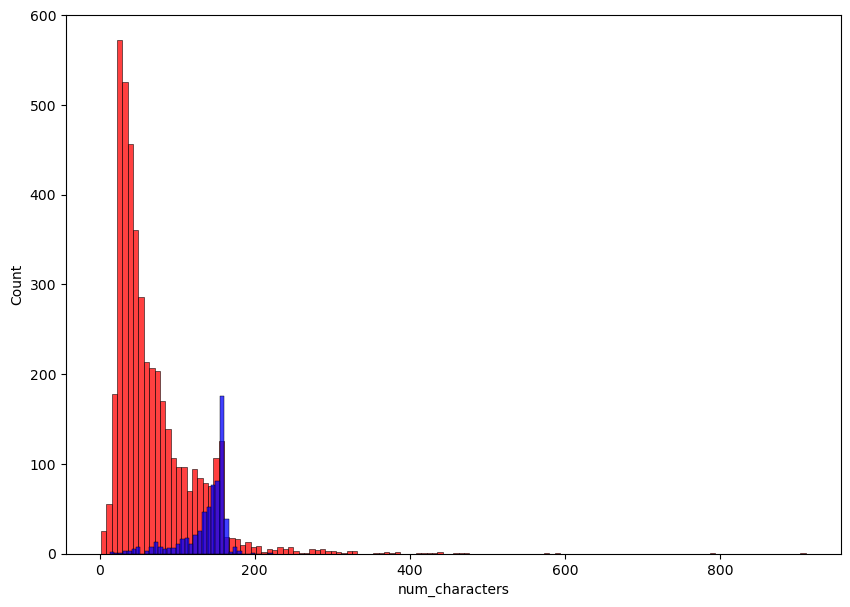

In [25]:
plt.figure(figsize=(10,7))
sns.histplot(df[df['type'] == 0]['num_characters'], color='red')
sns.histplot(df[df['type'] == 1]['num_characters'], color='blue')

<Axes: xlabel='num_words', ylabel='Count'>

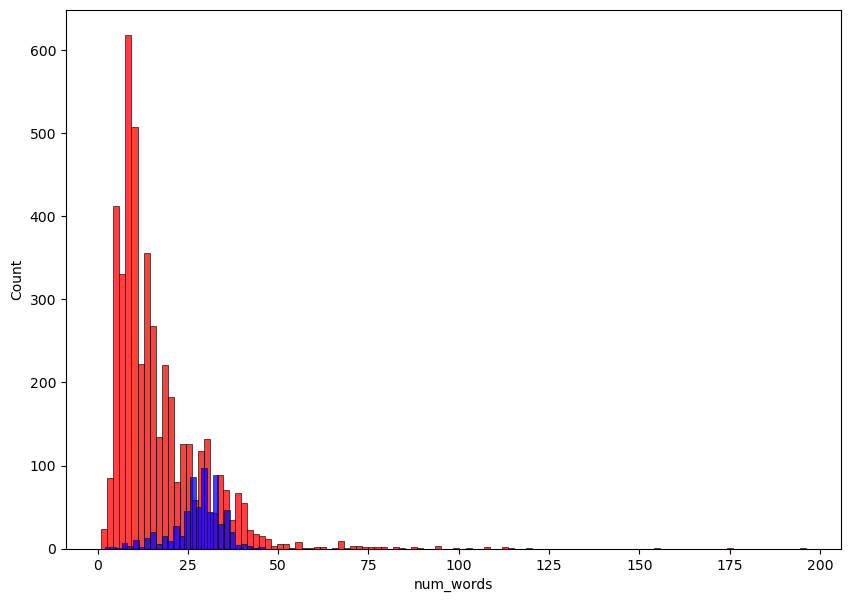

In [26]:
plt.figure(figsize=(10,7))
sns.histplot(df[df['type'] == 0]['num_words'], color='red')
sns.histplot(df[df['type'] == 1]['num_words'], color='blue')

C:\Users\aryan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


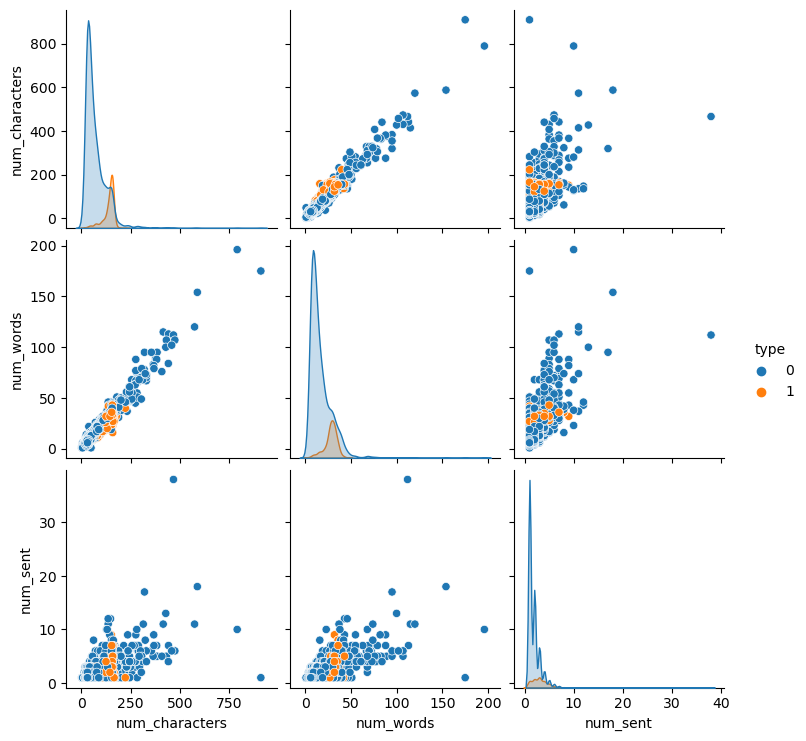

In [27]:
sns.pairplot(df, hue='type')

<Axes: >

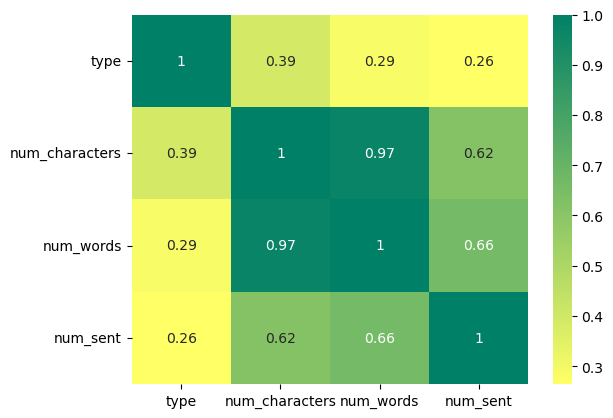

In [28]:
sns.heatmap(df.drop(['text'],axis=1).corr(), cmap='summer_r', annot=True)

### **Data Preprocessing**

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
ps = PorterStemmer()

In [32]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today")

print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


In [33]:
ps = PorterStemmer()
ps.stem('eating')

'eat'

In [34]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,type,text,num_characters,num_words,num_sent,transformed_text
0,0,Hope you are having a good week. Just checking in,49,11,2,hope good week check
1,0,K..give back my thanks.,23,7,1,k give back thank
2,0,Am also doing in cbe only. But have to pay.,43,12,2,also cbe pay
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3,complimentari 4 star ibiza holiday cash need u...
4,1,okmail: Dear Dave this is your final notice to...,161,32,3,okmail dear dave final notic collect 4 tenerif...


In [35]:
#pip install wordcloud

In [36]:
#
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [37]:
#
spam_wc = wc.generate(df[df['type'] == 1]['transformed_text'].str.cat(sep=''))

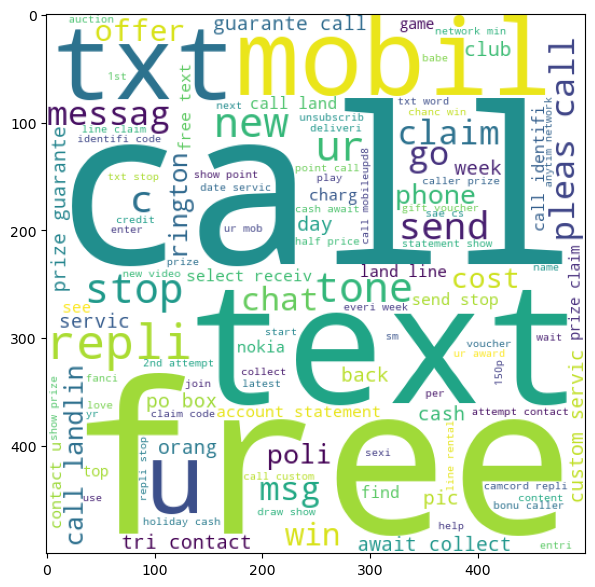

In [38]:
#
plt.figure(figsize=(10,7))
plt.imshow(spam_wc)

In [39]:
#
ham_wc = wc.generate(df[df['type'] == 0]['transformed_text'].str.cat(sep=''))

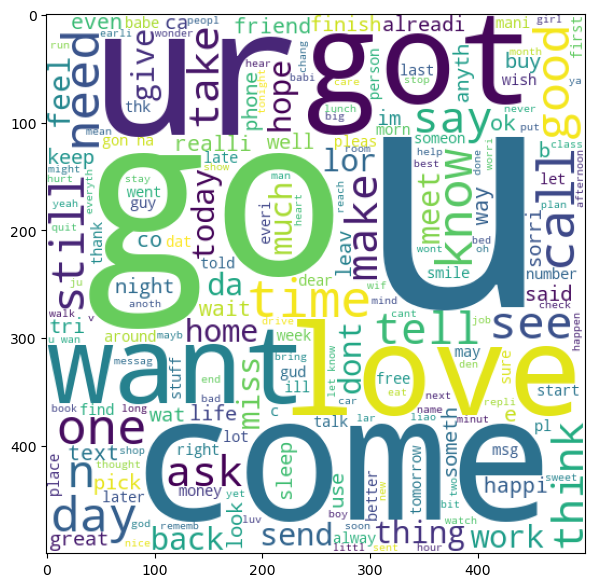

In [40]:
#
plt.figure(figsize=(10,7))
plt.imshow(ham_wc)

In [41]:
spam_corpus = []
for msg in df[df['type'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [42]:
len(spam_corpus)

9978

In [43]:
ham_corpus = []
for msg in df[df['type'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [44]:
len(ham_corpus)

35091

## **Building the model**

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [46]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [47]:
y = df['type'].values

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [51]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_pred1)*100:.2f}')
print(f'Confusion Matrix: {confusion_matrix(y_test,y_pred1)}')
print(f'Precision Score: {precision_score(y_test,y_pred1)*100:.2f}')

Accuracy Score: 87.98
Confusion Matrix: [[811 101]
 [ 23  97]]
Precision Score: 48.99


In [53]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_pred2)*100:.2f}')
print(f'Confusion Matrix: {confusion_matrix(y_test,y_pred2)}')
print(f'Precision Score: {precision_score(y_test,y_pred2)*100:.2f}')

Accuracy Score: 96.71
Confusion Matrix: [[911   1]
 [ 33  87]]
Precision Score: 98.86


In [54]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_pred3)*100:.2f}')
print(f'Confusion Matrix: {confusion_matrix(y_test,y_pred3)}')
print(f'Precision Score: {precision_score(y_test,y_pred3)*100:.2f}')

Accuracy Score: 97.29
Confusion Matrix: [[910   2]
 [ 26  94]]
Precision Score: 97.92


In [55]:
#pip install xgboost

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

In [59]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc  = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt= GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [60]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [61]:
"""
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision"""

'\ndef train_classifier(clf,x_train,y_train,x_test,y_test):\n    clf.fit(x_train,y_train)\n    y_pred = clf.predict(x_test)\n    accuracy = accuracy_score(y_test,y_pred)\n    precision = precision_score(y_test,y_pred)\n    \n    return accuracy,precision'

In [ ]:
"""train_classifier(svc,x_train,y_train,x_test,y_test)
"""

In [ ]:
"""accuracy_score = []
precision_score = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print('For ',name)
    print('Current accuracy: ',current_accuracy)
    print('Current precision: ',current_precision)
    
    accuracy_score.append(current_accuracy)
    precision_score.append(current_precision)
"""

In [63]:
model=LogisticRegression()

In [64]:
model.fit(x_train,y_train)

LogisticRegression()

In [65]:
y_pred=model.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}")
print(f"Precision Score: {precision_score(y_test,y_pred)*100:.2f}")

Accuracy Score: 95.35
Precision Score: 98.65


In [66]:
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

In [67]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [68]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [69]:
y_pred = voting.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}")
print(f"Precision Score: {precision_score(y_test,y_pred)*100:.2f}")

Accuracy Score: 97.77
Precision Score: 98.99
